# Build your Own ChatGPT  (Extension)

Submitted by

Sonit Nitin Patil
bm23btech11023

With punctuation support

## 1. Loading the given book and text processing it

In [1]:
import re
try:
    with open('book.txt', 'r', encoding='utf-8') as file:
        text = file.read().lower()
except UnicodeDecodeError:
    print("Error: Unable to decode file. Please check the file's encoding.")

words = re.findall(r'[\w+()=<>-]+|[\+\-\*/=<>]', text)


In [2]:
print(words[0:300])

['the', 'mahabharata', 'a', 'tale', 'of', 'krishna', '-', 'dwaipayana', 'vyasa', 'adi', 'parva', 'translators', 'preface', 'section', '1', 'section', '2', 'paushya', 'parva', 'pauloma', 'parva', 'astika', 'parva', 'adivansavatarana', 'parva', 'sambhava', 'parva', 'jatugriha', 'parva', 'hidimva-vadha', 'parva', 'vaka-vadha', 'parva', 'chaitraratha', 'parva', 'swayamvara', 'parva', 'vaivahika', 'parva', 'viduragamana', 'parva', 'rajya-labha', 'parva', 'arjuna-vanavasa', 'parva', 'subhadra-harana', 'parva', 'haranaharana', 'parva', 'khandava-daha', 'parva', 'translators', 'preface', 'the', 'object', 'of', 'a', 'translator', 'should', 'ever', 'be', 'to', 'hold', 'the', 'mirror', 'upto', 'his', 'author', 'that', 'being', 'so', 'his', 'chief', 'duty', 'is', 'to', 'represent', 'so', 'far', 'as', 'practicable', 'the', 'manner', 'in', 'which', 'his', 'author', 's', 'ideas', 'have', 'been', 'expressed', 'retaining', 'if', 'possible', 'at', 'the', 'sacrifice', 'of', 'idiom', 'and', 'taste', 'all'

In [3]:
from collections import Counter

In [4]:
all_word_count = Counter(words)

In [5]:
for i,j in zip(all_word_count.keys(), all_word_count.values()):
    print (i," -",j)

the  - 173136
mahabharata  - 50
a  - 30409
tale  - 42
of  - 133197
krishna  - 1840
-  - 81
dwaipayana  - 51
vyasa  - 464
adi  - 39
parva  - 307
translators  - 50
preface  - 6
section  - 2429
1  - 1854
2  - 942
paushya  - 22
pauloma  - 18
astika  - 88
adivansavatarana  - 3
sambhava  - 6
jatugriha  - 2
hidimva-vadha  - 2
vaka-vadha  - 2
chaitraratha  - 7
swayamvara  - 41
vaivahika  - 3
viduragamana  - 3
rajya-labha  - 2
arjuna-vanavasa  - 2
subhadra-harana  - 3
haranaharana  - 2
khandava-daha  - 3
object  - 757
translator  - 113
should  - 5994
ever  - 1151
be  - 13036
to  - 45490
hold  - 152
mirror  - 23
upto  - 3
his  - 23592
author  - 35
that  - 48840
being  - 3082
so  - 3068
chief  - 1256
duty  - 643
is  - 31887
represent  - 56
far  - 162
as  - 15293
practicable  - 4
manner  - 328
in  - 43257
which  - 7089
s  - 11685
ideas  - 20
have  - 7829
been  - 5392
expressed  - 49
retaining  - 9
if  - 3890
possible  - 66
at  - 7724
sacrifice  - 1521
idiom  - 2
and  - 97725
taste  - 180
all  - 20

In [6]:
print(len(all_word_count))
print(len(words))

41481
2551583


In [7]:
print(all_word_count['?'], " ", all_word_count['.'], " ", all_word_count[' '])

0   0   0


In [8]:
print("Probability of getting a Unique Word: ", len(all_word_count)/len(words))

Probability of getting a Unique Word:  0.016256966753580033


## 2. Computing Probabilities

### A. Calculating probability of each word

In [9]:
prob_each_word = {key: value / len(words) for key, value in all_word_count.items()}

In [10]:
for i,j in zip(prob_each_word.keys(), prob_each_word.values()):
    print (i," -",j)

the  - 0.06785434767358146
mahabharata  - 1.959567844745791e-05
a  - 0.011917699718174952
tale  - 1.6460369895864645e-05
of  - 0.052201711643321026
krishna  - 0.0007211209668664512
-  - 3.1744999084881814e-05
dwaipayana  - 1.998759201640707e-05
vyasa  - 0.00018184789599240943
adi  - 1.528462918901717e-05
parva  - 0.00012031746566739158
translators  - 1.959567844745791e-05
preface  - 2.3514814136949495e-06
section  - 0.0009519580589775053
1  - 0.0007266077568317393
2  - 0.00036918258195010704
paushya  - 8.622098516881481e-06
pauloma  - 7.054444241084848e-06
astika  - 3.4488394067525924e-05
adivansavatarana  - 1.1757407068474748e-06
sambhava  - 2.3514814136949495e-06
jatugriha  - 7.838271378983164e-07
hidimva-vadha  - 7.838271378983164e-07
vaka-vadha  - 7.838271378983164e-07
chaitraratha  - 2.7433949826441076e-06
swayamvara  - 1.6068456326915486e-05
vaivahika  - 1.1757407068474748e-06
viduragamana  - 1.1757407068474748e-06
rajya-labha  - 7.838271378983164e-07
arjuna-vanavasa  - 7.8382713

In [11]:
unique_words, unique_words_prob = list(prob_each_word.keys()), list(prob_each_word.values())

What can happen is Conditional prob can be 0. Rather than them being zero let us say that their cond prob is 0.001

In [21]:
conditional_probs = []

In [22]:
from math import comb

In [23]:
def count_contiguous_combinations(n, r):
    if r > n or r <= 0:
        return 0
    return n - r + 1

In [24]:
'''
for n in range(2, 7, 1): #n grams setter 2 gram to 6 gram string
    ngram_prob = dict()
    total_ngrams = count_contiguous_combinations(len(unique_words), n)
    for i in range(n, len(unique_words)+1, 1): #Taking a conditional n|n-1 (n gram) string
        condition = unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1])
        
        if(condition in ngram_prob.keys()):
            continue
        else:
            pass  
        n_gram_count = 0
        
        for j in range(n-1, len(unique_words), 1): #Iterating throughout text file to find repeated occurences
            cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])
            if (cond == condition):
                n_gram_count+=1
            else:
                pass

        prob = n_gram_count/total_ngrams
        ngram_prob[condition] = prob

    conditional_probs.append(ngram_prob)
            
            
'''     
    
        
        

'\nfor n in range(2, 7, 1): #n grams setter 2 gram to 6 gram string\n    ngram_prob = dict()\n    total_ngrams = count_contiguous_combinations(len(unique_words), n)\n    for i in range(n, len(unique_words)+1, 1): #Taking a conditional n|n-1 (n gram) string\n        condition = unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1])\n        \n        if(condition in ngram_prob.keys()):\n            continue\n        else:\n            pass  \n        n_gram_count = 0\n        \n        for j in range(n-1, len(unique_words), 1): #Iterating throughout text file to find repeated occurences\n            cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])\n            if (cond == condition):\n                n_gram_count+=1\n            else:\n                pass\n\n        prob = n_gram_count/total_ngrams\n        ngram_prob[condition] = prob\n\n    conditional_probs.append(ngram_prob)\n            \n            \n'

### B. Computing all conditional probabilities upto 6 gram string

In [25]:

for n in range(2, 7):  # n-grams from 2 to 6
    ngram_prob = {}
    total_ngrams = count_contiguous_combinations(len(words), n)

    # Precompute n-grams
    #ngrams = [unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1]) for i in range(n , len(unique_words) + 1)]
    
    # Use Counter to count occurrences
    ngram_counts = Counter()
    for i in range(n-1, len(words), 1): #Iterating throughout text file to find repeated occurences
        #cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])
        last_word = words[i]
        preceding_words = ",".join(words[i - n + 1:i])  # Join with commas
        condition = f"{last_word}|{preceding_words}"
        ngram_counts[condition] += 1

    for condition, n_gram_count in ngram_counts.items():
        prob = n_gram_count / total_ngrams if total_ngrams > 0 else 0

        ngram_prob[condition] = prob

    conditional_probs.append(ngram_prob)
        


In [26]:
first_10_items = list(conditional_probs[3].items())[:10]

for key, value in first_10_items:
    print(f"{key}: {value}")

of|the,mahabharata,a,tale: 3.919141833351035e-07
krishna|mahabharata,a,tale,of: 3.919141833351035e-07
-|a,tale,of,krishna: 3.919141833351035e-07
dwaipayana|tale,of,krishna,-: 3.919141833351035e-07
vyasa|of,krishna,-,dwaipayana: 3.919141833351035e-07
adi|krishna,-,dwaipayana,vyasa: 3.919141833351035e-07
parva|-,dwaipayana,vyasa,adi: 3.919141833351035e-07
translators|dwaipayana,vyasa,adi,parva: 3.919141833351035e-07
preface|vyasa,adi,parva,translators: 3.919141833351035e-07
section|adi,parva,translators,preface: 3.919141833351035e-07


In [27]:
temp_keys = list(conditional_probs[0].keys())
temp_vals = list(conditional_probs[0].values())

for i,j in zip(temp_keys,temp_vals):
    if i.endswith("|the"):
        print(f"{i}: {j}")

mahabharata|the: 1.489272145672763e-05
object|the: 0.00010072182669418423
mirror|the: 1.9595686127273196e-06
manner|the: 4.859730159563753e-05
sacrifice|the: 0.00010228948158436609
peculiarities|the: 3.9191372254546393e-07
sanskrit|the: 2.351482335272784e-06
endeavour|the: 2.7433960578182476e-06
present|the: 4.663773298291021e-05
following|the: 7.05444700581835e-05
great|the: 0.0005533821762341951
purely|the: 3.9191372254546393e-07
standard|the: 3.252883897127351e-05
translator|the: 1.9595686127273196e-06
sake|the: 0.0001618603674112766
original|the: 3.644797619672815e-05
narrow|the: 7.838274450909279e-07
preface|the: 7.838274450909279e-07
mahavira|the: 3.9191372254546393e-07
claims|the: 1.175741167636392e-06
author|the: 1.0189756786182063e-05
ideas|the: 2.351482335272784e-06
feet|the: 3.919137225454639e-05
laughter|the: 7.838274450909279e-07
accidental|the: 1.175741167636392e-06
essential|the: 2.7433960578182476e-06
risk|the: 3.919137225454639e-06
studied|the: 3.9191372254546393e-07
a

## 3. Input and Testing

In [28]:
inp = input("Enter a String: ")

Enter a String:  so


In [29]:
list_inp = inp.split(" ")
print(list_inp)

['so']


1. 2 gram (1gram|1gram) in at conditional_probs[0]
2. 3 gram (1gram|2gram) in at conditional_probs[1]
3. 4 gram (1gram|3gram) in at conditional_probs[2]
4. 5 gram (1gram|4gram) in at conditional_probs[3]
5. 6 gram (1gram|5gram) in at conditional_probs[4]
6. Rest all strings, consider last 6 gram text

In [30]:
test_condition = "|"
overflow_string = []
overflow_string_conditions = []
if(len(list_inp)>=0):
    n = 5 if (len(list_inp)>5) else len(list_inp)
    while(n!=0):
        s = list_inp[len(list_inp)-n :len(list_inp)]
        overflow_string.append(s)
        n-=1
    for j in overflow_string:
            test_condition = "|"
            for i in range(0, len(j), 1):
                if(i!=len(list_inp)-1):
                    test_condition = test_condition + j[i].lower() + ","
                else:
                    test_condition = test_condition + j[i].lower()
            overflow_string_conditions.append(test_condition if test_condition[-1]!=',' else test_condition.rstrip(','))
print(overflow_string_conditions)

['|so']


In [31]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [42]:
l = len(list_inp)
cases = dict()

if(l==0):
    max_key = max(prob_each_word, key=prob_each_word.get)
    print(inp+" "f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")


elif(l>0):
    n= 4 if (len(list_inp)>5) else len(list_inp)-1
    for k in overflow_string_conditions:
        temp_keys = list(conditional_probs[n].keys())
        temp_vals = list(conditional_probs[n].values())

        for i,j in zip(temp_keys,temp_vals):
            if i.endswith(k):
                cases[i] = j
       
        if(not bool(cases)):
            n-=1
            cases = dict()
            if(n<0):
                max_key = max(prob_each_word, key=prob_each_word.get)
                print(f"{max_key}")
                break
            continue
        
        
            
        max_key = max(cases, key=cases.get).replace(k, "")
        print(inp+" "+f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")
        break; 
    
            
        

So, we cried that


In [43]:
probability_array = []

In [46]:
inp = input("Enter a String: ")
z = int(input("Enter How many tokens to predict:"))

def sentence_completion(z, inp):
    the_counter = 0
    repeater = 2
    while(z):
        list_inp = inp.split(" ")

        test_condition = "|"
        overflow_string = []
        overflow_string_conditions = []
        if(len(list_inp)>=0):
            n = 5 if (len(list_inp)>5) else len(list_inp)
            while(n!=0):
                s = list_inp[len(list_inp)-n :len(list_inp)]
                overflow_string.append(s)
                n-=1
            for j in overflow_string:
                    test_condition = "|"
                    for i in range(0, len(j), 1):
                        if(i!=len(list_inp)-1):
                            test_condition = test_condition + j[i].lower() + ","
                        else:
                            test_condition = test_condition + j[i].lower()
                    overflow_string_conditions.append(test_condition if test_condition[-1]!=',' else test_condition.rstrip(','))


        l = len(list_inp)
        cases = dict()
        
        
        if(l>=0):
            if repeater == 0:
                the_counter=0
                repeater=2
            n= 4 if (len(list_inp)>5) else len(list_inp)-1
            for k in overflow_string_conditions:
                temp_keys = list(conditional_probs[n].keys())
                temp_vals = list(conditional_probs[n].values())
        
                for i,j in zip(temp_keys,temp_vals):
                    if i.endswith(k):
                        cases[i] = j
               
                if(not bool(cases)):
                    n-=1
                    cases = dict()
                    if(n<0):
                        max_key = max(prob_each_word, key=prob_each_word.get)
                        the_counter = the_counter + 1 if max_key == "the" else the_counter
                        repeater-=1
                        if the_counter>1:
                            max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                            max_value = prob_each_word[max_key]
                            probability_array.append(max_value)
                            inp = inp+" "+f"{max_key}"
                        print("\n"+inp+" "+f"{max_key}")
                        break
                    continue
                
                
                    
                max_key = max(cases, key=cases.get).replace(k, "")
                max_value = prob_each_word[max_key]
                probability_array.append(max_value)
                the_counter = the_counter + 1 if max_key == "the" else the_counter
                repeater-=1
                if the_counter>1:
                    max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                    max_value = prob_each_word[max_key]
                    probability_array.append(max_value)
                    inp = inp+" "+f"{max_key}"
                print("\n"+inp+" "+f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")
                
                inp = inp+" "+f"{max_key}"
                break; 

        z-=1

sentence_completion(z, inp)
                
    

Enter a String:  so we cried, or, we were not,
Enter How many tokens to predict: 10



so we cried, or, we were not, present

so we cried, or, we were not, present in

so we cried, or, we were not, present in the

so we cried, or, we were not, present in the assembly

so we cried, or, we were not, present in the assembly and

so we cried, or, we were not, present in the assembly and the

so we cried, or, we were not, present in the assembly and the whole

so we cried, or, we were not, present in the assembly and the whole conclave

so we cried, or, we were not, present in the assembly and the whole conclave was

so we cried, or, we were not, present in the assembly and the whole conclave was agitated


In [47]:
print(probability_array)

[0.01914105870747689, 0.005022764299652412, 0.0002692446218680717, 0.005022764299652412, 0.004774683010507595, 0.06785434767358146, 0.0019525134005047063, 0.0003848591247080734, 2.7433949826441076e-06, 0.010719228024328427, 0.001399131441148495, 3.527222120542424e-06, 0.005043927632375667, 0.0023491299322812545, 4.78134554117973e-05, 0.052201711643321026, 0.06785434767358146, 0.0004150364695171586, 0.038299753525556486, 0.06785434767358146, 0.0005576930086146521, 0.038299753525556486, 0.0028746860282420758, 0.011917699718174952, 4.702962827389899e-06, 0.00015676542757966328, 0.06785434767358146, 6.819296099715353e-05, 0.052201711643321026, 0.011917699718174952, 4.3110492584407405e-05, 0.052201711643321026, 0.0006701722029030606, 9.797839223728955e-05, 0.00020418696942251145, 0.016953005252033738, 0.06785434767358146, 0.00013129104559796802, 0.038299753525556486, 0.06785434767358146, 0.00041346881524136195, 1.802802417166128e-05, 0.003731801003533885, 0.0001003298736509845]


In [48]:
import numpy as np

In [49]:
probability_array1=np.array(probability_array)
word_array = np.arange(len(probability_array))

In [50]:
import matplotlib.pyplot as plt

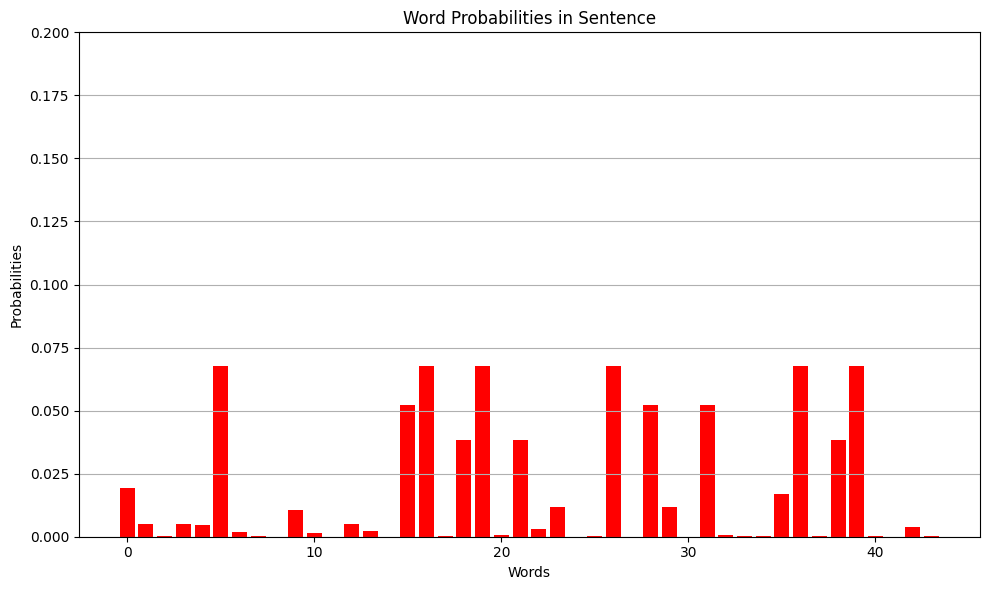

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(word_array, probability_array1, color='red')
plt.xlabel('Words')
plt.ylabel('Probabilities')
plt.title('Word Probabilities in Sentence')
plt.ylim(0, 0.2)
plt.grid(axis='y')

plt.tight_layout()
plt.show()